# ghg_analytics
## Insights into trends with global greenhouse gases and climate change action.

EPA1333 – Computer Engineering for Scientific Computing Final Project

### Authors
Group 6:
* Aashna Mittal
* Gamze Ünlü
* Jason R Wang

## Introduction

Anthropogenic climate change was first introduced into the global political arena as the United Nations Framework on Climate Change Convention (UNFCCC) in 1992. Since then, other international agreements have continued to refine mitigation action.

At 19th Conference of the Parties (to the UNFCCC) in 2013 in Warsaw, the UNFCCC members agreed to submit "Intended Nationally Determined Contributions" (INDCs) to signal what each country's greenhouse gas emission targets would be. At the 21st Conference in 2015, the Paris Agreement formalized these _intended_ emissions into simply "Nationally Determined Contributions" (NDCs).

Furthermore, the signatories to the Paris Agreement (which includes all UNFCCC signatories, and therefore, all UN member nations) have agreed to maintain global warming to 2ºC, but preferrably 1.5ºC, above pre-industrial levels. This Notebook intends to analyze the NDCs to estimate their potential to reach these temperature goals.

In [7]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN
plt.style.use('ggplot')

## 1. NDCs and Temperature Targets

To determine the impact of NDCs, we need to first understand their context by answering the following questions:
1. What do global emissions look like today?
2. If nothing changes, and the world continues doing _business as usual_ (BAU), how will the world look like in 2030?

Then, we can examine how NDCs compare:
3. If all NDCs are met, what will the total amount of emissions be?
4. What emission amounts are required to meet temperature targets?

_Note: Emissions are quantified in units of 'carbon dioxide-equivalent per year' [CO2e/yr] because the strength all greenhouse gases are measured relative to carbon dioxide and because the carbon cycle is a process. Global climate targets assume that natural GHG uptake will continue steadily, so reducing the rate of emissions from countries will lead to a net decrease in the concentration of GHGs in the atmosphere._

### Current Greenhouse Gas Emissions

The World Bank and the World Resources Institute both maintain databases of current GHG emissions. The primary data source is from the UNFCCC's reporting window; each UNFCCC member submits annual 'GHG Inventories', which track national emissions with two-year delay.

Source: https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE?view=chart
(Is this true, Aashna?) - Jason

In [25]:
# Import World Bank data on GHGs
ghgDf_WBoriginal = pd.read_csv("data/GreenhouseGasData.csv", sep=',', skipinitialspace=True, skiprows=4) 

# Drop the indicator name and indicator code as the values are same across the whole dataframe
ghgDf_WB = ghgDf_WBoriginal.drop(["Indicator Code", "Indicator Name"], axis = 1)

# Drop all the columns that contain only null values
ghgDf_WB.dropna(axis = 1, how="all", inplace=True)  

# Drop all the rows that contain only null values, starting from column 2
ghgDf_WB.dropna(axis = 0, how="all", subset = ghgDf_WB.columns[2:], inplace= True)  

# Interpolate missing values and then use backfill to fill starting NA values of a row
ghgDf_WB.iloc[:,2:] = ghgDf_WB.iloc[:,2:].interpolate(axis = 1).bfill(axis=1)

In [26]:
# View the cleaned WB GHG DataFrame
ghgDf_WB.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,42.306298,42.786948,43.286613,43.724590,44.130957,44.481908,131.633746,135.055319,...,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02
1,Afghanistan,AFG,14306.616300,14391.778200,13040.848000,13535.754100,14945.968200,14574.164000,14746.851000,15247.281000,...,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,1.798131e+04,1.816886e+04
2,Angola,AGO,60648.601080,39162.171430,42205.650700,44252.669120,40179.233500,44429.300030,38448.024090,43563.412180,...,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,4.087865e+04,4.165716e+04
3,Albania,ALB,6960.868200,6950.036100,7613.266100,7348.492100,7632.664300,7873.037000,8470.978400,8948.980900,...,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,8.712296e+03,8.898641e+03
5,Arab World,ARB,552362.062026,576946.152269,625015.943839,699280.217253,679448.005841,683966.235399,775863.729505,799971.040800,...,1.963193e+06,1.660587e+06,1.767879e+06,1.731289e+06,2.355481e+06,2.364089e+06,2.387502e+06,1.924245e+06,2.483349e+06,1.908696e+06


### Create Comparison for Country Group Codes and Names

In [11]:
#Import the dataframe which contains the codes of country group aggregates
CountryGroupCodes = pd.read_excel("data/CountryGroups.xls", sheet = "Groups", skiprows=226, header = None)
CountryGroupCodes.dropna(how="all", inplace=True, axis=1)
CountryGroupCodes.drop(columns=0,inplace=True)
CountryGroupCodes.dropna(how="all", inplace=True, axis=0)
CountryGroupCodes.columns = ["Aggregate Name", "Aggregate Code"]
CountryGroupCodes

#Drop the rows corresponding to aggregate country codes from existing dataframe to create a new country dataframe 
GreenhouseGasesCountryDf = ghgDf_WB[ghgDf_WB["Country Code"].apply(lambda x: False if x in CountryGroupCodes["Aggregate Code"].values else True)]

## Data visualization

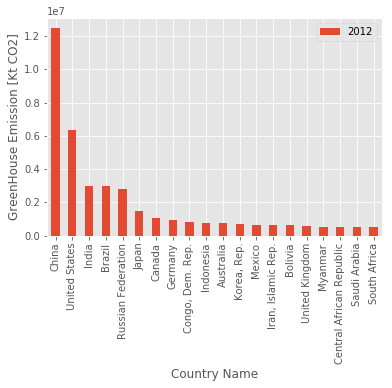

In [12]:
#Sorted bar chart of 2012 greenhouse gases

GreenhouseGasesCountryDf.sort_values(by="2012", ascending=False)[["Country Name", "2012"]]

GreenhouseGasesTop20Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:20,:]

GreenhouseGasesTop20Emitters[["Country Name", "2012"]].plot(x = "Country Name", kind="bar")

plt.ylabel("GreenHouse Emission [Kt CO2]")
plt.show()

Time series for greenhouse gases of major (top 10 depending on V1) present polluters (from 1990 to most-recent)

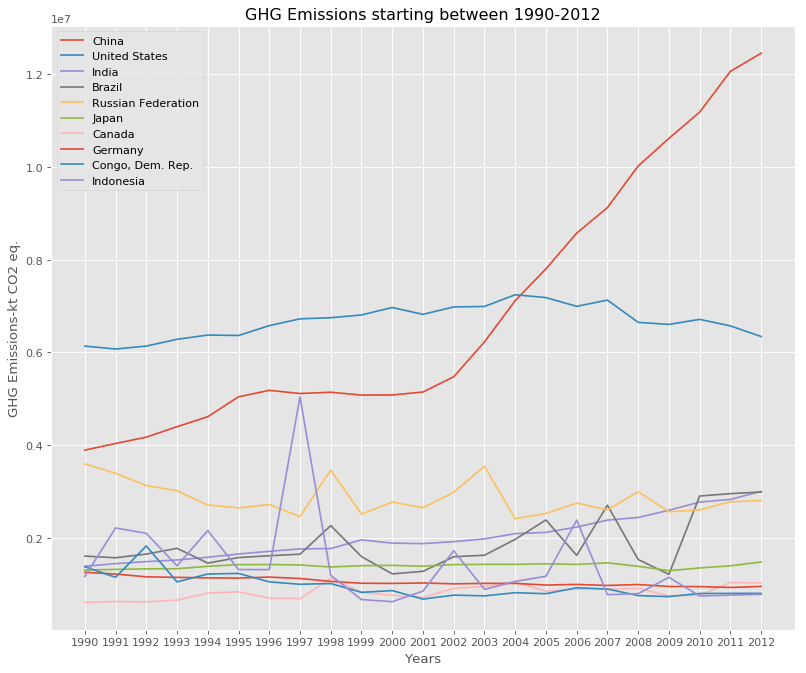

In [14]:
# Time series for ghg emissions of the top 10 most polluting countries.

GreenhouseGasesTop10Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:10,:]

plt.figure(figsize=(12, 10), dpi=80) 

for i in range(0,10):
    
    row = GreenhouseGasesTop10Emitters.iloc[i,22:]
    plt.plot(row)

plt.MaxNLocator(10)
plt.xlabel("Years")
plt.ylabel("GHG Emissions-kt CO2 eq.")
plt.title("GHG Emissions starting between 1990-2012")
#plt.legend(loc=((1.05,0.3)))#how to show country names instead of the numbers 
plt.legend(GreenhouseGasesTop10Emitters["Country Name"] )

plt.show()

We observe that the top polluter of the world China has increasing emissions starting from 1990s till 2012. The second polluter US, on the other hand shows a stable curve over the years. Until 2004 it is the top polluter of the world. India........

## NDCs
This file gives data in the format: ISO Country Code,Country Name, Goal Year, Value (in MtCO2e), if goal is a range, and the type of goal.

In [17]:
NDCsDf_raw = pd.read_csv('data/wri/CW_NDC_quantification_April30.csv')
NDCsDf = NDCsDf_raw.dropna(axis=0).drop(328) #328 is a mis-entry, as determined through inspection

# Check data input
NDCsDf.head(5)

,ISO,Country,Year,Value,Range,Label
0,AFG,Afghanistan,2020,35.5,No,BAU
1,AFG,Afghanistan,2025,40.3,No,Conditional
2,AFG,Afghanistan,2025,41.7,No,BAU
3,AFG,Afghanistan,2030,42.7,No,Conditional
4,AFG,Afghanistan,2030,48.9,No,BAU


Some countries' NDCs are given as a range. For simplicity, this analysis will only examine the mean of that range.

In [18]:
rangedIndices = NDCsDf[NDCsDf['Range'] == 'Yes'].index

# Note that each range is a pair
# Is there a non-for loop method to do this?
for i in range(0,len(rangedIndices)-1,2):    
    NDCsDf.loc[rangedIndices[i],'Value'] = (
        (NDCsDf['Value'][rangedIndices[i]] + NDCsDf['Value'][rangedIndices[i+1]])/2
    )
    
# Drop the column 'Range', since it is not really needed anymore.
NDCsDf = NDCsDf.drop(labels=rangedIndices[1::2], axis=0).drop(labels='Range', axis=1)

From here on, the situation in 2030 will be the primary focus. Where countries have not submitted data for 2030, the furthest value is used. Furthermore, the best case where the higher goal between choices (e.g. uncondintional if both it and conditional exist) is taken.

Note that the EU, which is collectively a large emitter, has only submitted NDCs for 2020.

In [19]:
NDC_byCountry = []

for i in NDCsDf['ISO'].unique():
    NDC_byCountry.append(NDCsDf[NDCsDf['ISO']==i]['Value'].min() )

In [20]:
d = {
    'Country': NDCsDf['ISO'].unique(),
    'Goal':    NDC_byCountry 
}

NDCs_clean = pd.DataFrame(d)

In [21]:
NDCs_clean.head()

,Country,Goal
0,AFG,35.5000
1,ALB,5.4500
2,AND,0.3299
3,AGO,96.6300
4,ATG,0.2910


## Data visualization

In [23]:
NDCs_clean.head()

,Country,Goal
0,AFG,35.5000
1,ALB,5.4500
2,AND,0.3299
3,AGO,96.6300
4,ATG,0.2910


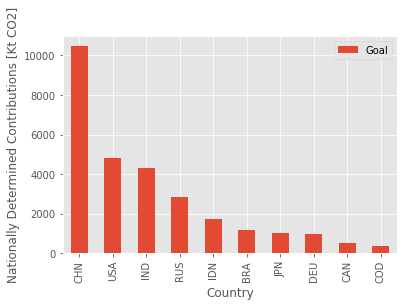

In [24]:
#Greenhouse reductions by countries according to their NDCs. Data is already converted to mtCO2e. Countries have different goals 
#in terms of which year they are based on and which year they aim also unconditional and conditional goals. Here the goals are  
#not based on year target but the minimum goal of each country is choosen?? 

#See if the ones who are most polluting also have the highest reduction aim

GreenhouseGasesTop10Emitters

NDCsTop10 = NDCs_clean[NDCs_clean["Country"].apply(lambda x: True if x in GreenhouseGasesTop10Emitters["Country Code"].values else False)]

NDCsTop10

NDCsTop10= NDCsTop10.sort_values(by="Goal", ascending=False)

NDCsTop10.plot(x = "Country", kind="bar")

plt.ylabel("Nationally Determined Contributions [Kt CO2]")
plt.show()

IND-India
IDN-Indonesia
In the first graph we observed that China,US and India are the top 3 major polluters and their reduction targets allign with this ranking. In the greenhouse gases emission graph the list goes on as Brazil, Russia, Japan, Canada, Germany, Congo and Indonesia. Among these countries even though Indonesia is the least polluting among these, it has higher reduction goals than many of the rest of the countries. 